## Predicción en partidos de futbol 

En el presente trabajo, el objetivo principal es hacer un buen modelo para predecir resultados de partidos de futbol, esto utilizando registros anteriores y haciendo uso de estadísticas clave como valor de mercado (Transfermarket), momento de forma, club ELO ratings, entre otras.

In [1]:
import sys
# se conecta a FBref, Transfermarket, ClubElo para descargar datos 
!{sys.executable} -m pip install soccerdata 
# para que pandas lea tablas web
!{sys.executable} -m pip install html5lib 

In [2]:
import soccerdata as sd
import pandas as pd

# Seleccionaré las 5 grandes ligas de europa, trabajando con las últimas 5 temporadas 
ligas = ['ENG-Premier League', 'ESP-La Liga', 'ITA-Serie A', 'GER-Bundesliga', 'FRA-Ligue 1']
temporadas = ['2023','2024','2025','2026']  #2026: temp 2025/2026
fbref = sd.FBref(leagues=ligas, seasons = temporadas)
df_schedule = fbref.read_schedule()
# En la temporada actual hay partidos agendados que aún no se han jugado, hay que eliminarlos para trabajar
df_jugados = df_schedule.dropna(subset=['home_score', 'away_score']).copy()
# convertmos goles a numérico ( a veces bajan como texto)
df_jugados['home_score'] = pd.to_numeric(df_jugados['home_score'])
df_jugados['away_score'] = pd.to_numeric(df_jugados['away_score'])

print(f"Total de partidos en el registro: {len(df_jugados)}")
display(df_jugados[df_jugados['season'] == 2026].tail(5))

[01/27/26 19:07:43] INFO     No custom team name replacements found. You can configure these in       ]8;id=971593;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=759665;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_config.py#92\92]8;;\
                             C:\Users\Moises\soccerdata\config\teamname_replacements.json.                         

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=962953;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=341942;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_config.py#198\198]8;;\
                             C:\Users\Moises\soccerdata\config\league_dict.json.                                   

                    INFO     Saving cached data to C:\Users\Moises\soccerdata\data\FBref             ]8;id=582279;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=129182;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_common.py#249\249]8;;\

[2026-01-27 19:07:43] INFO     TLSLibrary:_load_library:397 - Successfully loaded TLS library: C:\Users\Moises\anaconda3\envs\tf_env\Lib\site-packages\tls_requests\bin\tls-client-xgo-1.13.1-windows-amd64.dll


                    INFO     Successfully loaded TLS library:                                      ]8;id=4604;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\tls_requests\models\libraries.py\libraries.py]8;;\:]8;id=910075;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\tls_requests\models\libraries.py#397\397]8;;\
                             C:\Users\Moises\anaconda3\envs\tf_env\Lib\site-packages\tls_requests\                 
                             bin\tls-client-xgo-1.13.1-windows-amd64.dll                                           

                    WARNING  C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\fbr ]8;id=586816;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\warnings.py\warnings.py]8;;\:]8;id=381082;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\warnings.py#109\109]8;;\
                             ef.py:93: UserWarning: You are trying to scrape data for all of the                   
                             Big 5 European leagues. This can be done more efficiently by setting                  
                             leagues='Big 5 European Leagues Combined'.                                            
                               warnings.warn(                                                                      
                                                                                                                   

[01/27/26 19:07:51] ERROR    Error while scraping https://fbref.com/en/comps/. Retrying... (attempt  ]8;id=889596;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=45383;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_common.py#526\526]8;;\
                             1 of 5).                                                                              
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_co               
                             mmon.py", line 506, in _download_and_save                                             
                                 response.raise_for_status()                                                       
                               File                                                                                
                             "C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\tls_requests\m               
                             odels\response.py", line 207, in raise_for_status                                     
                                 raise HTTPError(                                                                  
                             tls_requests.exceptions.HTTPError: 403 Client Error: Forbidden for url:               
                             https://fbref.com/en/comps/                                                           

[01/27/26 19:07:58] ERROR    Error while scraping https://fbref.com/en/comps/. Retrying... (attempt  ]8;id=398421;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=304041;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_common.py#526\526]8;;\
                             2 of 5).                                                                              
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_co               
                             mmon.py", line 506, in _download_and_save                                             
                                 response.raise_for_status()                                                       
                               File                                                                                
                             "C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\tls_requests\m               
                             odels\response.py", line 207, in raise_for_status                                     
                                 raise HTTPError(                                                                  
                             tls_requests.exceptions.HTTPError: 403 Client Error: Forbidden for url:               
                             https://fbref.com/en/comps/                                                           

[01/27/26 19:08:15] ERROR    Error while scraping https://fbref.com/en/comps/. Retrying... (attempt  ]8;id=937055;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=411204;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_common.py#526\526]8;;\
                             3 of 5).                                                                              
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_co               
                             mmon.py", line 506, in _download_and_save                                             
                                 response.raise_for_status()                                                       
                               File                                                                                
                             "C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\tls_requests\m               
                             odels\response.py", line 207, in raise_for_status                                     
                                 raise HTTPError(                                                                  
                             tls_requests.exceptions.HTTPError: 0 TLS Client Error: failed to do                   
                             request: Get "https://fbref.com/en/comps/": HTTP/3 request failed:                    
                             CRYPTO_ERROR 0x128 (remote): tls: handshake failure for url:                          
                             https://fbref.com/en/comps/                                                           

[01/27/26 19:08:23] ERROR    Error while scraping https://fbref.com/en/comps/. Retrying... (attempt  ]8;id=175775;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=266460;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_common.py#526\526]8;;\
                             4 of 5).                                                                              
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_co               
                             mmon.py", line 506, in _download_and_save                                             
                                 response.raise_for_status()                                                       
                               File                                                                                
                             "C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\tls_requests\m               
                             odels\response.py", line 207, in raise_for_status                                     
                                 raise HTTPError(                                                                  
                             tls_requests.exceptions.HTTPError: 403 Client Error: Forbidden for url:               
                             https://fbref.com/en/comps/                                                           

[01/27/26 19:08:32] ERROR    Error while scraping https://fbref.com/en/comps/. Retrying... (attempt  ]8;id=298603;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=220414;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_common.py#526\526]8;;\
                             5 of 5).                                                                              
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_co               
                             mmon.py", line 506, in _download_and_save                                             
                                 response.raise_for_status()                                                       
                               File                                                                                
                             "C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\tls_requests\m               
                             odels\response.py", line 207, in raise_for_status                                     
                                 raise HTTPError(                                                                  
                             tls_requests.exceptions.HTTPError: 403 Client Error: Forbidden for url:               
                             https://fbref.com/en/comps/                                                           

ConnectionError: Could not download https://fbref.com/en/comps/.

In [1]:
import pandas as pd
import numpy as np
import requests
import io

# Descargamos los datos de las últimas temporadas de la liga que indique
 # E0: Premier League
base_url = "https://www.football-data.co.uk/mmz4281/{}/E0.csv"  # premier league
temporadas = ['2122','2223','2324', '2425', '2526'] # Últimas 5 temporadas

dfs = []

for temp in temporadas:
    try:
        url = base_url.format(temp)  #para rellenar {} con las temp
        s = requests.get(url).content
        df_temp = pd.read_csv(io.StringIO(s.decode('latin-1'))) # Latin-1 suele funcionar mejor con esta web
        dfs.append(df_temp)
    except Exception as e:
        print(f"⚠️ No se pudo descargar la temporada {temp}: {e}")
        
# Unimos las 4 temp en un df
df_main = pd.concat(dfs, ignore_index=True)


# Identificamos las columnas de apuestas (Home, Draw, Away) de las casas principales
# B365=Bet365, WH=William Hill, BW=Bet&Win, IW=Interwetten, VC=BetVictor
cols_home = [c for c in df_main.columns if c.endswith('H') and c not in ['FTHG', 'HTHG']] 
cols_draw = [c for c in df_main.columns if c.endswith('D')]
cols_away = [c for c in df_main.columns if c.endswith('A') and c not in ['FTAG', 'HTAG']]

# Calculamos el promedio ignorando nulos (nan)
# Esto debido a que hay varios dtos faltantes y de esta forma no perdemos regitros al eliminarlos 
df_main['Odds_Home'] = df_main[cols_home].mean(axis=1)
df_main['Odds_Draw'] = df_main[cols_draw].mean(axis=1)
df_main['Odds_Away'] = df_main[cols_away].mean(axis=1)

# por si quedó algún partido sin cuota de apuestas 
df_clean = df_main.dropna(subset=['Odds_Home', 'Odds_Away']).copy()

# seleccionamos algunas estadísticas de los partidos (equipos, goles, tiros / tiros al arco, promedio momios de apuestas)
cols_keep = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'Odds_Home', 'Odds_Draw', 'Odds_Away']
df_modelo = df_clean[cols_keep].copy()

# Arreglar Fechas (ponerlas en un solo formato)
df_modelo['Date'] = pd.to_datetime(df_modelo['Date'], dayfirst=True)
df_modelo = df_modelo.sort_values('Date')

# calcular rachas de tiros, esto para tomarlo como una de las características importantes 

def calcular_rachas(df): #separamos los partidos de un equipo en perspectiva de visita y de local 
    home = df[['Date', 'HomeTeam', 'HS', 'HST', 'AS', 'AST', 'FTHG', 'FTAG']].rename(
        columns={'HomeTeam': 'Team', 'HS': 'Shots_For', 'HST': 'ShotsT_For', 'AS': 'Shots_Ag', 'AST': 'ShotsT_Ag', 'FTHG': 'Goals_For', 'FTAG': 'Goals_Ag'}
    )
    away = df[['Date', 'AwayTeam', 'AS', 'AST', 'HS', 'HST', 'FTAG', 'FTHG']].rename(
        columns={'AwayTeam': 'Team','AS': 'Shots_For', 'AST': 'ShotsT_For', 'HS': 'Shots_Ag', 'HST': 'ShotsT_Ag', 'FTAG': 'Goals_For', 'FTHG': 'Goals_Ag'}
    )
#juntamos para tener todos los partidos de cierto equipo
    combined = pd.concat([home, away]).sort_values(['Team', 'Date']) 
    
    # Obtener la media de los últimos 5 partidos 
    # shift() es usado para que no se use el dato del partido para predecir ese mismo
    combined['Form_ShotsT'] = combined.groupby('Team')['ShotsT_For'].transform( #groupby('Team') para no combinar las rachhas de distintos equipos 
        lambda x: x.shift().rolling(window=5, min_periods=3).mean() # predecir usando los últimos 5 partidos sin contar el dato a predecir 
    )
    combined['Form_Goals'] = combined.groupby('Team')['Goals_For'].transform(
        lambda x: x.shift().rolling(window=5, min_periods=3).mean() 
    )

    combined['Form_Shots'] = combined.groupby('Team')['Shots_For'].transform(
        lambda x: x.shift().rolling(window=5, min_periods=3).mean() 
    )
    return combined

df_rachas = calcular_rachas(df_modelo)


# Unimos racha local
df_final = pd.merge(df_modelo, df_rachas[['Date', 'Team', 'Form_ShotsT', 'Form_Shots', 'Form_Goals']], 
                    left_on=['Date', 'HomeTeam'], right_on=['Date', 'Team'], how='inner')
df_final.rename(columns={'Form_ShotsT': 'Home_ShotT_Form', 'Form_Shots': 'Home_Shot_Form', 'Form_Goals': 'Home_Goal_Form'}, inplace=True)
df_final.drop(columns=['Team'], inplace=True)

# Unimos racha visitante
df_final = pd.merge(df_final, df_rachas[['Date', 'Team', 'Form_ShotsT', 'Form_Shots', 'Form_Goals']], 
                    left_on=['Date', 'AwayTeam'], right_on=['Date', 'Team'], how='inner')
df_final.rename(columns={'Form_ShotsT': 'Away_ShotT_Form','Form_Shots':'Away_Shot_Form', 'Form_Goals': 'Away_Goal_Form'}, inplace=True)
df_final.drop(columns=['Team'], inplace=True)

# Borramos filas iniciales (las primeras fechas no tienen racha previa calculable)
df_final.dropna(inplace=True)

print(f" DATASET LISTO: {len(df_final)} partidos procesados.")
display(df_final.tail())

C:\Users\Moises\AppData\Local\Temp\ipykernel_27724\3163159028.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_main['Odds_Home'] = df_main[cols_home].mean(axis=1)
C:\Users\Moises\AppData\Local\Temp\ipykernel_27724\3163159028.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_main['Odds_Draw'] = df_main[cols_draw].mean(axis=1)
C:\Users\Moises\AppData\Local\Temp\ipykernel_27724\3163159028.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

 DATASET LISTO: 1699 partidos procesados.


,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,Odds_Home,Odds_Draw,Odds_Away,Home_ShotT_Form,Home_Shot_Form,Home_Goal_Form,Away_ShotT_Form,Away_Shot_Form,Away_Goal_Form
1745,2026-01-25,Brentford,Nott'm Forest,0,2,10,7,1,2,1.884167,3.535625,3.530000,5.4,13.2,2.2,3.6,11.4,0.8
1746,2026-01-25,Crystal Palace,Chelsea,1,3,13,10,7,6,2.946667,3.630625,2.067083,2.4,10.8,0.4,3.4,11.8,1.4
1747,2026-01-25,Newcastle,Aston Villa,0,2,15,14,4,8,2.033333,3.668125,2.957500,5.8,15.6,1.8,4.6,13.2,1.2
1748,2026-01-25,Arsenal,Man United,2,3,15,10,4,3,1.679167,4.300625,4.588333,5.0,16.4,1.8,5.8,16.2,1.4
1749,2026-01-26,Everton,Leeds,1,1,10,14,3,4,2.390833,3.153125,2.597500,4.0,12.4,1.2,4.4,12.0,1.2


In [7]:
import sys
!{sys.executable} -m pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 2.1 MB/s eta 0:00:35
    --------------------------------------- 1.0/72.0 MB 2.2 MB/s eta 0:00:33
    --------------------------------------- 1.3/72.0 MB 2.0 MB/s eta 0:00:35
   - -------------------------------------- 1.8/72.0 MB 2.2 MB/s eta 0:00:33
   - -------------------------------------- 2.6/72.0 MB 2.4 MB/s eta 0:00:29
   - -------------------------------------- 3.4/72.0 MB 2.6 MB/s eta 0:00:26
   -- ------------------------------------- 4.2/72.0 MB 2.8 MB/s eta 0:00:25
   -- ------------------------------------- 5.0/72.0 MB 3.0 MB/s eta 0:00:23
   --- ------------------------------------ 6.0/72.0 MB 3.2 MB/s eta 0:00:21
   --- ------------------------------------ 6.8/72.0 MB 3.2 MB/s eta 0:00:21
   ---- ------------

In [3]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 0 = Gana Local, 1 = Empate, 2 = Gana Visita
condiciones = [
    (df_final['FTHG'] > df_final['FTAG']), 
    (df_final['FTHG'] == df_final['FTAG']),
    (df_final['FTHG'] < df_final['FTAG'])
]
df_final['target'] = np.select(condiciones, [0, 1, 2])

# Usar solo lo conocido antes del partido
features = [
    'Odds_Home', 'Odds_Draw', 'Odds_Away',
    'Home_Shot_Form', 'Away_Shot_Form',
    'Home_ShotT_Form', 'Home_Goal_Form', 
    'Away_ShotT_Form', 'Away_Goal_Form'
]

x = df_final[features]  # entradas
y = df_final['target']   # objetivo

# 20% datos de prueba, el resto de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False) #shuffle = False para no usar el futuro para predecir el pasado

print(f"Entrenando con {X_train.shape[0]} partidos.")
print(f"Probando con los últimos {X_test.shape[0]} partidos.")

Entrenando con 1359 partidos.
Probando con los últimos 340 partidos.


In [4]:
modelo_final = XGBClassifier(
    n_estimators=300,       # Número de árboles
    learning_rate=0.03,     # Aprende despacio para no memorizar (overfitting)
    max_depth=3,            # Árboles poco profundos 
    subsample=0.8,          # Usa el 80% de datos por árbol para variar
    colsample_bytree=0.8,   # Usa el 80% de columnas por árbol
    random_state=42         # Semilla
)

modelo_final.fit(X_train, y_train)

# Evaluación
y_pred = modelo_final.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n PRECISIÓN ACTUAL (Accuracy): {acc:.2%}")

print(classification_report(y_test, y_pred, target_names=['Local', 'Empate', 'Visitante']))


 PRECISIÓN ACTUAL (Accuracy): 51.76%
              precision    recall  f1-score   support

       Local       0.56      0.79      0.65       151
      Empate       0.35      0.07      0.11        88
   Visitante       0.47      0.50      0.49       101

    accuracy                           0.52       340
   macro avg       0.46      0.45      0.42       340
weighted avg       0.48      0.52      0.46       340



Tenemos una precisión superior al 50%, un problema es que el modelo no se atreve a predecir empates, agregaré más ligas (las 5 más importantes de europa) además de característica como racha de puntos e intentaré nuevamente con esto.

In [1]:
import soccerdata as sd
import pandas as pd
import requests
import io
import numpy as np

#SP1: LaLiga, I1: Serie A, D1: Bundesliga, F1: Ligue 1
ligas = ['E0', 'SP1', 'I1', 'D1', 'F1']
temporadas = ['2122', '2223','2324', '2425', '2526'] 
base_url = "https://www.football-data.co.uk/mmz4281/{}/{}.csv"

dfs = []

for liga in ligas:
    for temp in temporadas:
        try:
            url = base_url.format(temp, liga)
            s = requests.get(url).content
            df_temp = pd.read_csv(io.StringIO(s.decode('latin-1')))
            df_temp['League_ID'] = liga # Para guardar cada liga
            dfs.append(df_temp)
        except:
            continue

df_main = pd.concat(dfs, ignore_index=True)


cols_home = [c for c in df_main.columns if c.endswith('H') and c not in ['FTHG', 'HTHG']] 
cols_draw = [c for c in df_main.columns if c.endswith('D')]
cols_away = [c for c in df_main.columns if c.endswith('A') and c not in ['FTAG', 'HTAG']]

for col in cols_home + cols_draw + cols_away:
    df_main[col] = pd.to_numeric(df_main[col], errors='coerce')

# Promedio de cuotas de apuestas
df_main['Odds_Home'] = df_main[cols_home].mean(axis=1)
df_main['Odds_Draw'] = df_main[cols_draw].mean(axis=1)
df_main['Odds_Away'] = df_main[cols_away].mean(axis=1)

df_clean = df_main.dropna(subset=['Odds_Home', 'Odds_Away', 'FTHG']).copy()
df_clean['Date'] = pd.to_datetime(df_clean['Date'], dayfirst=True)

# Calculamos puntos hechos en los partidos
condiciones = [
    (df_clean['FTHG'] > df_clean['FTAG']), # Gana Local
    (df_clean['FTHG'] == df_clean['FTAG']), # Empate
    (df_clean['FTHG'] < df_clean['FTAG'])  # Gana Visita
]
# Puntos para el Local
df_clean['Home_Pts'] = np.select(condiciones, [3, 1, 0]) # victoria = 3puntos, empate =1 punto, derrota = 0 puntos
# Puntos para el Visitante
df_clean['Away_Pts'] = np.select(condiciones, [0, 1, 3])

# Seleccionamos columnas importantes (tiros, goles, tiros al arco, casas de apuestas, puntos)
cols_keep = ['Date', 'League_ID', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 
             'Odds_Home', 'Odds_Draw', 'Odds_Away', 'Home_Pts', 'Away_Pts']
df_modelo = df_clean[cols_keep].sort_values('Date')


# Obtenemos las rachas de tiros, goles y puntos para cada equipo
def calcular_rachas_complejas(df):
    # Partidos de local
    home = df[['Date', 'HomeTeam', 'HS', 'AS', 'HST', 'AST', 'FTHG', 'FTAG', 'Home_Pts']].rename(
        columns={
            'HomeTeam': 'Team',
            'HS': 'Shots_Total_For',   'AS': 'Shots_Total_Ag',   # Tiros Totales (A favor / En contra)
            'HST': 'Shots_Target_For', 'AST': 'Shots_Target_Ag', # Tiros Arco (A favor / En contra)
            'FTHG': 'Goals_For',       'FTAG': 'Goals_Ag',
            'Home_Pts': 'Pts'
        }
    )
    
    # Partidos de visita 
    away = df[['Date', 'AwayTeam', 'AS', 'HS', 'AST', 'HST', 'FTAG', 'FTHG', 'Away_Pts']].rename(
        columns={
            'AwayTeam': 'Team',
            'AS': 'Shots_Total_For',   'HS': 'Shots_Total_Ag',   # Al revés para el visitante
            'AST': 'Shots_Target_For', 'HST': 'Shots_Target_Ag',
            'FTAG': 'Goals_For',       'FTHG': 'Goals_Ag',
            'Away_Pts': 'Pts'
        }
    )
    
    combined = pd.concat([home, away]).sort_values(['Team', 'Date'])
    
    # Obtenemos el promedio de los últimos 5 partidos para las siguientes métricas.
    metricas = ['Shots_Total_For', 'Shots_Total_Ag', 
                'Shots_Target_For', 'Shots_Target_Ag', 
                'Goals_For', 'Goals_Ag', 'Pts']
    
    for metrica in metricas:
        # Creamos la columna "Form_..."
        combined[f'Form_{metrica}'] = combined.groupby('Team')[metrica].transform(
            lambda x: x.shift().rolling(window=5, min_periods=3).mean()
        )
    
    return combined

df_rachas = calcular_rachas_complejas(df_modelo)

# Definimos las columnas que recién creamos
cols_a_usar = ['Date', 'Team', 
               'Form_Shots_Total_For', 'Form_Shots_Total_Ag',
               'Form_Shots_Target_For', 'Form_Shots_Target_Ag',
               'Form_Goals_For', 'Form_Goals_Ag', 
               'Form_Pts']

# Pegar al Local
df_final = pd.merge(df_modelo, df_rachas[cols_a_usar], 
                    left_on=['Date', 'HomeTeam'], right_on=['Date', 'Team'], how='inner')

# Renombrar Local (Añadiendo Home_)
mapa_renombre_local = {col: f"Home_{col.replace('Form_', '')}_Form" for col in cols_a_usar if col not in ['Date', 'Team']}
df_final.rename(columns=mapa_renombre_local, inplace=True)
df_final.drop(columns=['Team'], inplace=True)

# Pegar al Visitante 
df_final = pd.merge(df_final, df_rachas[cols_a_usar], 
                    left_on=['Date', 'AwayTeam'], right_on=['Date', 'Team'], how='inner')

# Renombrar Visitante (Añadiendo Away_)
mapa_renombre_visita = {col: f"Away_{col.replace('Form_', '')}_Form" for col in cols_a_usar if col not in ['Date', 'Team']}
df_final.rename(columns=mapa_renombre_visita, inplace=True)
df_final.drop(columns=['Team'], inplace=True)

df_final.dropna(inplace=True)

print(f"Tenemos: {df_final.shape[0]} partidos procesados.")

print(df_final.head())

[02/03/26 22:56:33] INFO     No custom team name replacements found. You can configure these in       ]8;id=558113;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=378072;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_config.py#92\92]8;;\
                             C:\Users\Moises\soccerdata\config\teamname_replacements.json.                         

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=327724;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=212342;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\soccerdata\_config.py#198\198]8;;\
                             C:\Users\Moises\soccerdata\config\league_dict.json.                                   

[02/03/26 22:57:22] WARNING  C:\Users\Moises\AppData\Local\Temp\ipykernel_25084\4244179876.py:36:   ]8;id=670135;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\warnings.py\warnings.py]8;;\:]8;id=568941;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\warnings.py#109\109]8;;\
                             PerformanceWarning: DataFrame is highly fragmented.  This is usually                  
                             the result of calling `frame.insert` many times, which has poor                       
                             performance.  Consider joining all columns at once using                              
                             pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe                
                             = frame.copy()`                                                                       
                               df_main['Odds_Home'] = df_main.mean(axis=1)                                         
                                                                                                                   

                    WARNING  C:\Users\Moises\AppData\Local\Temp\ipykernel_25084\4244179876.py:37:   ]8;id=997444;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\warnings.py\warnings.py]8;;\:]8;id=949630;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\warnings.py#109\109]8;;\
                             PerformanceWarning: DataFrame is highly fragmented.  This is usually                  
                             the result of calling `frame.insert` many times, which has poor                       
                             performance.  Consider joining all columns at once using                              
                             pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe                
                             = frame.copy()`                                                                       
                               df_main['Odds_Draw'] = df_main.mean(axis=1)                                         
                                                                                                                   

                    WARNING  C:\Users\Moises\AppData\Local\Temp\ipykernel_25084\4244179876.py:38:   ]8;id=779999;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\warnings.py\warnings.py]8;;\:]8;id=440098;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\warnings.py#109\109]8;;\
                             PerformanceWarning: DataFrame is highly fragmented.  This is usually                  
                             the result of calling `frame.insert` many times, which has poor                       
                             performance.  Consider joining all columns at once using                              
                             pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe                
                             = frame.copy()`                                                                       
                               df_main['Odds_Away'] = df_main.mean(axis=1)                                         
                                                                                                                   

Tenemos: 0 partidos procesados.
Empty DataFrame
Columns: [Date, League_ID, HomeTeam, AwayTeam, FTHG, FTAG, HS, AS, HST, AST, Odds_Home, Odds_Draw, Odds_Away, Home_Pts, Away_Pts, Home_Shots_Total_For_Form, Home_Shots_Total_Ag_Form, Home_Shots_Target_For_Form, Home_Shots_Target_Ag_Form, Home_Goals_For_Form, Home_Goals_Ag_Form, Home_Pts_Form, Away_Shots_Total_For_Form, Away_Shots_Total_Ag_Form, Away_Shots_Target_For_Form, Away_Shots_Target_Ag_Form, Away_Goals_For_Form, Away_Goals_Ag_Form, Away_Pts_Form]
Index: []

[0 rows x 29 columns]


Hubo un error, tal vez con el merge al unir columnas, puede que no coincidan completamente las fechas.


In [10]:
# Aseguramos que las tablas tengan el orden correcto de las fechas para que al pegarlas sean la misma 
df_modelo['Date'] = pd.to_datetime(df_modelo['Date'])
df_rachas['Date'] = pd.to_datetime(df_rachas['Date'])

df_modelo['HomeTeam'] = df_modelo['HomeTeam'].astype(str).str.strip() # por si falla algún espacio ("Arsenal" =! "Arsenal ")
df_modelo['AwayTeam'] = df_modelo['AwayTeam'].astype(str).str.strip()
df_rachas['Team'] = df_rachas['Team'].astype(str).str.strip()

# Columnas que queremos traer (sin duplicar Fecha ni Equipo)
cols_metricas = [c for c in df_rachas.columns if c.startswith('Form_')]
cols_rachas_clean = ['Date', 'Team'] + cols_metricas

print(f"Inicio: {len(df_modelo)} partidos.")


# Left Join: "Mantén el partido aunque no encuentres la racha del local" (para los primeros partidos)
df_step1 = pd.merge(df_modelo, df_rachas[cols_rachas_clean], 
                    left_on=['Date', 'HomeTeam'], right_on=['Date', 'Team'], 
                    how='left')

# Renombramos
mapa_local = {col: f"Home_{col.replace('Form_', '')}_Form" for col in cols_metricas}
df_step1.rename(columns=mapa_local, inplace=True)
df_step1.drop(columns=['Team'], inplace=True)



# Para visitante 
df_final = pd.merge(df_step1, df_rachas[cols_rachas_clean], 
                    left_on=['Date', 'AwayTeam'], right_on=['Date', 'Team'], 
                    how='left')

# Renombramos
mapa_visita = {col: f"Away_{col.replace('Form_', '')}_Form" for col in cols_metricas}
df_final.rename(columns=mapa_visita, inplace=True)
df_final.drop(columns=['Team'], inplace=True)


# En lugar de borrar las filas con NaN (que son las primeras jornadas), esos datos se rellenan con el promedio del equipo 

cols_nuevas = list(mapa_local.values()) + list(mapa_visita.values())

# Rellenamos los huecos con el promedio 
for col in cols_nuevas:
    promedio = df_final[col].mean()
    df_final[col] = df_final[col].fillna(promedio)

print(f" FINAL: {len(df_final)} partidos recuperados y listos.")
display(df_final.tail())

Inicio: 8203 partidos.
 FINAL: 8203 partidos recuperados y listos.


,Date,League_ID,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,...,Home_Goals_For_Form,Home_Goals_Ag_Form,Home_Pts_Form,Away_Shots_Total_For_Form,Away_Shots_Total_Ag_Form,Away_Shots_Target_For_Form,Away_Shots_Target_Ag_Form,Away_Goals_For_Form,Away_Goals_Ag_Form,Away_Pts_Form
8198,2026-02-01,NaN,Getafe,Celta,0,0,9.0,5.0,2.0,1.0,...,0.6,1.8,0.4,11.0,11.4,5.2,3.4,1.8,0.8,2.0
8199,2026-02-01,NaN,Strasbourg,Paris SG,1,2,9.0,13.0,4.0,4.0,...,1.4,0.8,1.6,16.6,7.2,7.8,2.8,2.8,0.6,3.0
8200,2026-02-02,NaN,Mallorca,Sevilla,4,1,11.0,15.0,7.0,5.0,...,1.2,2.0,0.8,14.2,11.6,5.8,5.4,0.8,1.8,0.8
8201,2026-02-02,NaN,Sunderland,Burnley,3,0,14.0,5.0,5.0,0.0,...,0.8,1.6,1.0,8.6,23.0,2.6,9.0,1.2,2.0,0.6
8202,2026-02-02,NaN,Udinese,Roma,1,0,8.0,10.0,4.0,3.0,...,1.4,1.2,1.4,15.0,7.4,5.0,2.4,1.4,0.4,2.0


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 0 = Gana Local, 1 = Empate, 2 = Gana Visita
condiciones = [
    (df_final['FTHG'] > df_final['FTAG']),
    (df_final['FTHG'] == df_final['FTAG']),
    (df_final['FTHG'] < df_final['FTAG'])
]
df_final['target'] = np.select(condiciones, [0, 1, 2]) 

# Definimos las variables ede predicción
features = [
    # Cuotas 
    'Odds_Home', 'Odds_Draw', 'Odds_Away',
    
    # Racha del local
    'Home_Shots_Total_For_Form',   # Cuánto tira en total
    'Home_Shots_Total_Ag_Form',    # Cuánto le tiran (Defensa)
    'Home_Shots_Target_For_Form',  # Remates al arco hechos
    'Home_Shots_Target_Ag_Form',   # Remates al arco recibidos
    'Home_Goals_For_Form',         # Goles marcados
    'Home_Goals_Ag_Form',          # Goles recibidos 
    'Home_Pts_Form',               # Capacidad de sacar puntos
    
    # Racha del visitante 
    'Away_Shots_Total_For_Form',
    'Away_Shots_Total_Ag_Form',
    'Away_Shots_Target_For_Form',
    'Away_Shots_Target_Ag_Form',
    'Away_Goals_For_Form',
    'Away_Goals_Ag_Form',
    'Away_Pts_Form'
]

X = df_final[features]
y = df_final['target']

# Usamos los últimos 20% de partidos para probar (respetando el tiempo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


# Modelo 
modelo = XGBClassifier(
    n_estimators=500,       # Más árboles porque tenemos más datos
    learning_rate=0.02,     # Aprendizaje lento para mayor precisión
    max_depth=4,            # Un poco más de profundidad para entender relaciones complejas
    subsample=0.7,          # Evita sobreajuste
    colsample_bytree=0.7,
    random_state=42
)

modelo.fit(X_train, y_train)

# 5. EVALUACIÓN
y_pred = modelo.predict(X_test)
acc = accuracy_score(y_test, y_pred)


print(f" PRECISIÓN FINAL: {acc:.2%}")

print("Reporte detallado por clase (0=Local, 1=Empate, 2=Visita):")
print(classification_report(y_test, y_pred))


 PRECISIÓN FINAL: 53.92%
Reporte detallado por clase (0=Local, 1=Empate, 2=Visita):
              precision    recall  f1-score   support

           0       0.54      0.81      0.65       702
           1       0.38      0.05      0.09       399
           2       0.54      0.54      0.54       531

    accuracy                           0.54      1632
   macro avg       0.49      0.47      0.43      1632
weighted avg       0.51      0.54      0.48      1632



<Figure size 1000x800 with 0 Axes>

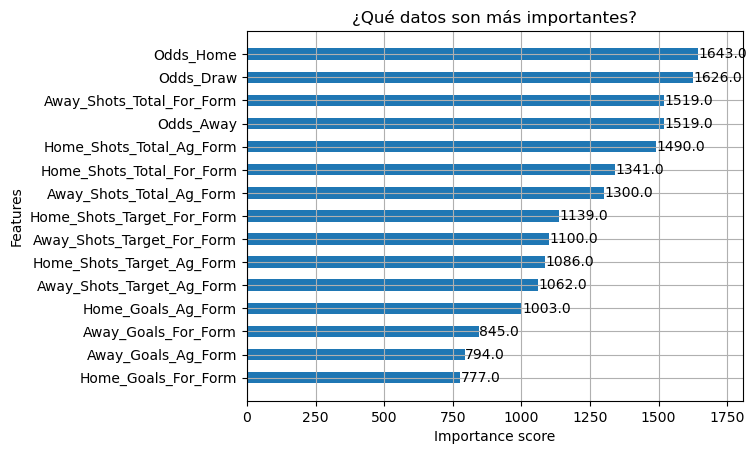

In [20]:
# 6. ¿QUÉ VARIABLES IMPORTAN MÁS? (Gráfica)
plt.figure(figsize=(10, 8))
plot_importance(modelo, max_num_features=15, height=0.5, importance_type='weight')
plt.title("¿Qué datos son más importantes?")
plt.show()

In [11]:
display(df_final.tail(50))

,Date,League_ID,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,...,Home_Goals_Ag_Form,Home_Pts_Form,Away_Shots_Total_For_Form,Away_Shots_Total_Ag_Form,Away_Shots_Target_For_Form,Away_Shots_Target_Ag_Form,Away_Goals_For_Form,Away_Goals_Ag_Form,Away_Pts_Form,target
8106,2026-01-23,NaN,Auxerre,Paris SG,0,1,8.0,16.0,0.0,8.0,...,1.8,0.8,16.8,7.6,7.0,3.8,2.6,0.8,2.4,2
8107,2026-01-23,NaN,Levante,Elche,3,2,26.0,6.0,6.0,3.0,...,1.2,1.0,11.4,17.2,2.8,6.4,1.8,1.8,1.0,0
8108,2026-01-23,NaN,St Pauli,Hamburg,0,0,8.0,5.0,3.0,2.0,...,1.4,1.0,14.0,11.0,6.2,3.8,1.2,1.8,1.0,1
8109,2026-01-23,NaN,Inter,Pisa,6,2,34.0,8.0,14.0,3.0,...,0.6,2.6,11.2,12.4,3.8,4.8,0.8,1.8,0.6,0
8110,2026-01-24,NaN,Bayern Munich,Augsburg,1,2,15.0,16.0,6.0,6.0,...,1.0,2.6,13.0,12.0,3.8,3.8,0.6,1.6,0.6,2
8111,2026-01-24,NaN,Sevilla,Ath Bilbao,2,1,10.0,15.0,7.0,3.0,...,1.6,0.8,16.4,10.2,5.8,4.6,1.0,1.6,0.8,0
8112,2026-01-24,NaN,Ein Frankfurt,Hoffenheim,1,3,9.0,10.0,3.0,5.0,...,2.0,1.2,12.4,9.4,5.6,3.8,2.0,0.8,2.0,2
8113,2026-01-24,NaN,Vallecano,Osasuna,1,3,11.0,14.0,4.0,5.0,...,1.8,1.0,11.8,13.6,3.8,5.0,1.4,1.2,1.4,2
8114,2026-01-24,NaN,Valencia,Espanol,3,2,10.0,16.0,5.0,6.0,...,1.6,1.0,12.6,11.6,4.2,4.0,0.8,1.2,1.4,0
8115,2026-01-24,NaN,Villarreal,Real Madrid,0,2,8.0,14.0,1.0,4.0,...,1.2,1.8,19.8,10.0,8.2,3.4,2.2,0.8,2.4,2


In [13]:
def predict_match(equipo_local, equipo_visita, cuota_L, cuota_E, cuota_V):
    """
    1. Busca las estadísticas más recientes de ambos equipos en la base de datos.
    2. Construye la fila de datos con las 14 variables complejas.
    3. Usa el modelo entrenado para predecir.
    """
    try:
        #  Buscar la ÚLTIMA racha conocida de cada equipo
        # Ordenamos por fecha para asegurarnos de tomar el dato más reciente
        racha_local = df_rachas[df_rachas['Team'] == equipo_local].sort_values('Date').iloc[-1]
        racha_visita = df_rachas[df_rachas['Team'] == equipo_visita].sort_values('Date').iloc[-1]
        
        # Construir el DataFrame con las variables EXACTAS que espera el modelo
        datos_partido = pd.DataFrame({
            'Odds_Home': [cuota_L],
            'Odds_Draw': [cuota_E],
            'Odds_Away': [cuota_V],
            
            # Datos LOCAL
            'Home_Shots_Total_For_Form': [racha_local['Form_Shots_Total_For']],
            'Home_Shots_Total_Ag_Form':  [racha_local['Form_Shots_Total_Ag']],
            'Home_Shots_Target_For_Form':[racha_local['Form_Shots_Target_For']],
            'Home_Shots_Target_Ag_Form': [racha_local['Form_Shots_Target_Ag']],
            'Home_Goals_For_Form':       [racha_local['Form_Goals_For']],
            'Home_Goals_Ag_Form':        [racha_local['Form_Goals_Ag']],
            'Home_Pts_Form':             [racha_local['Form_Pts']],
            
            # Datos VISITA
            'Away_Shots_Total_For_Form': [racha_visita['Form_Shots_Total_For']],
            'Away_Shots_Total_Ag_Form':  [racha_visita['Form_Shots_Total_Ag']],
            'Away_Shots_Target_For_Form':[racha_visita['Form_Shots_Target_For']],
            'Away_Shots_Target_Ag_Form': [racha_visita['Form_Shots_Target_Ag']],
            'Away_Goals_For_Form':       [racha_visita['Form_Goals_For']],
            'Away_Goals_Ag_Form':        [racha_visita['Form_Goals_Ag']],
            'Away_Pts_Form':             [racha_visita['Form_Pts']]
        })
        
        #  Predecir
        prediccion = modelo.predict(datos_partido)[0]
        probabilidades = modelo.predict_proba(datos_partido)[0]
        
        mapa = {0: 'Gana LOCAL', 1: 'EMPATE', 2: 'Gana VISITA'}
        
        print(f"\n {equipo_local} vs {equipo_visita}")
        print(f"   Resultado Esperado: {mapa[prediccion]}")
        print(f"   Probabilidades: L: {probabilidades[0]:.0%} | E: {probabilidades[1]:.0%} | V: {probabilidades[2]:.0%}")

    except IndexError:
        print(f" Error: No encontré datos recientes para {equipo_local} o {equipo_visita}. ¿Están bien escritos?")

Podemos probar este moelo con partidos que se están jugado, solo necesitamos conocer lo que ya tiene la base de datos y la informaci´´on adicional de las casas de apuestas dan para cada partido.

In [12]:
predict_match('Paris FC','Marseille', 4.20,3.82,1.76)


 Paris FC vs Marseille
   Resultado Esperado: Gana VISITA
   Probabilidades: L: 14% | E: 29% | V: 57%


In [14]:
predict_match('Monaco','Rennes', 1.93,3.80,3.49)


 Monaco vs Rennes
   Resultado Esperado: Gana LOCAL
   Probabilidades: L: 57% | E: 25% | V: 18%


In [15]:
predict_match('Lorient','Nantes', 1.88,3.41,4.26)


 Lorient vs Nantes
   Resultado Esperado: Gana LOCAL
   Probabilidades: L: 47% | E: 32% | V: 21%


In [16]:
predict_match('Wolves', 'Bournemouth', 2.92, 3.47, 2.36)


 Wolves vs Bournemouth
   Resultado Esperado: Gana VISITA
   Probabilidades: L: 22% | E: 26% | V: 52%


Con este mismo modelo podemos cambiar el clasificador y determinar cuántos goles hay por partido o akl menos decir si hav over/ under de 2.5 goles, tal vez alcancemos más preciisión tratando de determinar esto.

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Sumamos goles local + visita
df_final['Total_Goals'] = df_final['FTHG'] + df_final['FTAG']

# Si hay más de 2.5 goles (es decir, 3 o más) es un 1. Si no, es un 0.
df_final['target_goals'] = np.where(df_final['Total_Goals'] > 2.5, 1, 0)


# determinamos variales de predicción
features_goals = [
    'Odds_Home', 'Odds_Draw', 'Odds_Away',  #tal vez ayuden con la disparidad de los equipos en el partido
    
    'Home_Shots_Total_For_Form', 'Home_Shots_Total_Ag_Form', 
    'Home_Shots_Target_For_Form', 'Home_Shots_Target_Ag_Form',
    'Home_Goals_For_Form', 'Home_Goals_Ag_Form',             # Añadimos la forma de los equipos en tiros y goles
    
    'Away_Shots_Total_For_Form', 'Away_Shots_Total_Ag_Form',
    'Away_Shots_Target_For_Form', 'Away_Shots_Target_Ag_Form',
    'Away_Goals_For_Form', 'Away_Goals_Ag_Form'              
]

X = df_final[features_goals]   #variables 
y = df_final['target_goals']  #objetivo

# separamos datos igual que antes 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Configuración específica para binario (0 o 1)
modelo_goles = XGBClassifier(
    n_estimators=500,
    learning_rate=0.02,
    max_depth=4,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42,
    eval_metric='logloss' # Métrica para clasificación binaria
)

modelo_goles.fit(X_train, y_train)

# evaluamos el modelo
y_pred = modelo_goles.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f" PRECISIÓN EN GOLES: {acc:.2%}")

print("0 = Under 2.5 (Pocos goles) | 1 = Over 2.5 (Muchos goles)")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


 PRECISIÓN EN GOLES: 55.51%
0 = Under 2.5 (Pocos goles) | 1 = Over 2.5 (Muchos goles)
[[345 449]
 [277 561]]
              precision    recall  f1-score   support

           0       0.55      0.43      0.49       794
           1       0.56      0.67      0.61       838

    accuracy                           0.56      1632
   macro avg       0.56      0.55      0.55      1632
weighted avg       0.56      0.56      0.55      1632



<Figure size 1000x800 with 0 Axes>

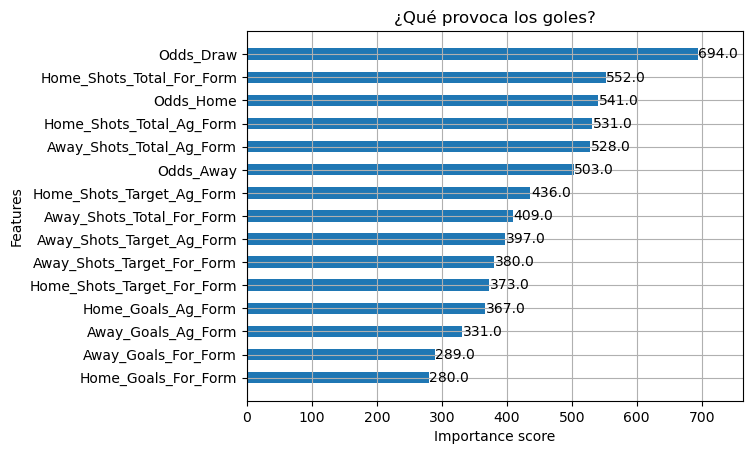

In [18]:
# 5. GRÁFICA DE IMPORTANCIA (Para ver qué causa los goles)
plt.figure(figsize=(10, 8))
plot_importance(modelo_goles, max_num_features=15, height=0.5, importance_type='weight', title='¿Qué provoca los goles?')
plt.show()

Hemos probado con algunos valores de learning rate y ciertos parámetros para el modelo, sin embargo, podemos encontrar alguna combinación que aumente la precisión final. 

Usaré $optuna$, una herramienta que explora diferentes combinaciones de parámetros que se le indiquen para observar la precisión en cada experimento y seleccionar la combbinación en el experimento que arroje mayor precisión.

In [26]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import TimeSeriesSplit

condiciones = [
    (df_final['FTHG'] > df_final['FTAG']),
    (df_final['FTHG'] == df_final['FTAG']),
    (df_final['FTHG'] < df_final['FTAG'])
]
df_final['target'] = np.select(condiciones, [0, 1, 2]) 

# Definimos las variables ede predicción
features = [
    # Cuotas 
    'Odds_Home', 'Odds_Draw', 'Odds_Away',
    
    # Racha del local
    'Home_Shots_Total_For_Form',   # Cuánto tira en total
    'Home_Shots_Total_Ag_Form',    # Cuánto le tiran (Defensa)
    'Home_Shots_Target_For_Form',  # Remates al arco hechos
    'Home_Shots_Target_Ag_Form',   # Remates al arco recibidos
    'Home_Goals_For_Form',         # Goles marcados
    'Home_Goals_Ag_Form',          # Goles recibidos 
    'Home_Pts_Form',               # Capacidad de sacar puntos
    
    # Racha del visitante 
    'Away_Shots_Total_For_Form',
    'Away_Shots_Total_Ag_Form',
    'Away_Shots_Target_For_Form',
    'Away_Shots_Target_Ag_Form',
    'Away_Goals_For_Form',
    'Away_Goals_Ag_Form',
    'Away_Pts_Form'
]

X = df_final[features]
y = df_final['target'] # en este caso probaremos combinaciones de pará,etros para mejorar la predicción del partido

# Usamos TimeSeriesSplit para validar respetando el tiempo (no mezclar futuro con pasado)
# Esto divide los datos en 5 bloques cronológicos.
tscv = TimeSeriesSplit(n_splits=5)

# definimos la función que ejecutará optuna n veces con valores diferentes e los parámetrs a variar
def objective(trial):
    # definir el intervalo de cada parámetro para que optuna busque combinaciones en ese rango
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),     # Cuántos árboles
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1), # Velocidad de aprendizaje
        'max_depth': trial.suggest_int('max_depth', 3, 10),               # Profundidad del árbol
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),          # Datos usados por árbol
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0), # Columnas usadas
        'gamma': trial.suggest_float('gamma', 0, 5),                      # Control de regularización
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),              # Regularización L1
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),            # Regularización L2
        'n_jobs': -1,                                                     # Usar todos los núcleos del CPU
        'random_state': 42
    }
    
    # Guarda la precisión obtenida en cada experimento
    scores = []
    
    #  Validación Cruzada 
    # EEsto es, entrenar y probar en diferentes tiempos (ya que es importante tener en cuenta las fechas)
    for train_index, test_index in tscv.split(X):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        
        # Entrenamos el modelo con los parámetros sugeridos por Optuna
        model = XGBClassifier(**param)
        model.fit(X_train_fold, y_train_fold)
        
        # Evaluamos
        preds = model.predict(X_test_fold)
        acc = accuracy_score(y_test_fold, preds)
        scores.append(acc)
    
    # El objetivo es maximizar el promedio de precisión en los 5 conjuntos de partidos
    return np.mean(scores)

# Creamos estudio en optuna donde se hacen los experimentos
study = optuna.create_study(direction='maximize') # Queremos maximizar la accuracy
study.optimize(objective, n_trials=50) # Probará 50 combinaciones 


print(" MEJORES HIPERPARÁMETROS ENCONTRADOS:")
print(study.best_params)
print(f"🎯 Mejor Precisión Promedio: {study.best_value:.2%}")


[I 2026-02-02 20:11:02,026] A new study created in memory with name: no-name-204156fe-cff4-461b-96f9-7c814cb0691c
[I 2026-02-02 20:11:06,584] Trial 0 finished with value: 0.5411331861662988 and parameters: {'n_estimators': 184, 'learning_rate': 0.023731544750547475, 'max_depth': 6, 'subsample': 0.5599606378937896, 'colsample_bytree': 0.933530977922061, 'gamma': 2.3317720207736303, 'reg_alpha': 3.955557652291386, 'reg_lambda': 1.6676244942395513}. Best is trial 0 with value: 0.5411331861662988.
[I 2026-02-02 20:11:18,827] Trial 1 finished with value: 0.5406916850625461 and parameters: {'n_estimators': 713, 'learning_rate': 0.09090402906730184, 'max_depth': 4, 'subsample': 0.7438842985907848, 'colsample_bytree': 0.8663264558497883, 'gamma': 3.8399350966771206, 'reg_alpha': 2.497163961567886, 'reg_lambda': 4.603784500882471}. Best is trial 0 with value: 0.5411331861662988.
[I 2026-02-02 20:11:22,954] Trial 2 finished with value: 0.5434878587196469 and parameters: {'n_estimators': 177, 'le

 MEJORES HIPERPARÁMETROS ENCONTRADOS:
{'n_estimators': 302, 'learning_rate': 0.03902589772861775, 'max_depth': 3, 'subsample': 0.764248744934353, 'colsample_bytree': 0.7920613021448816, 'gamma': 4.815429477740875, 'reg_alpha': 4.53749150529058, 'reg_lambda': 0.09391547133976275}
🎯 Mejor Precisión Promedio: 54.39%


In [27]:
# Entrenamiento con el mejor modelo
best_params = study.best_params # el mejor experimento
modelo_final_optuna = XGBClassifier(**best_params, n_jobs=-1, random_state=42)

# Entrenamos con el 80% original y probamos con el 20% final para confirmar
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.2, shuffle=False)
modelo_final_optuna.fit(X_train_final, y_train_final)

acc_final = accuracy_score(y_test_final, modelo_final_optuna.predict(X_test_final))
print(f" Precisión en prueba: {acc_final:.2%}")

 Precisión en prueba: 54.23%


Es una precisión mayor a la que hemos obtenido anteriormente, aunque la diferencia es poca, l selección de parámetros puede mejorar la precisión final, las siguientes gráficas dan una idea de la importancia de cada hiperparámetro en el modelo y el rango donde se puede obtener una mayor precisión.

In [31]:
import joblib
joblib.dump(study, 'estudio_optuna')

['estudio_optuna']

In [32]:
import sys
!{sys.executable} -m pip install plotly

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 2.1 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.9 MB 2.4 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/9.9 MB 2.5 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.9 MB 2.5 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/9.9 MB 2.7 MB/s eta 0:00:03
   ------------- -------------------------- 3.4/9.9 MB 2.5 MB/s eta 0:00:03
   --------------- ------------------------ 3.9/9.9 MB 2.5 MB/s eta 0:00:03
   ------------------ --------------------- 4.5/9.9 MB 2.6 MB/s eta 0:00:03
   --------------------- ------------------ 5.2/9.9 MB 2.7 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.9 MB 2.5 MB/s eta 0:00:02
   ------------------------- -------------- 6.3/9.9 MB 2.6 MB/s eta 0:00:02
   ----------------------

In [1]:
import optuna
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_slice
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_rank

In [4]:
import joblib
import optuna.visualization as vis

studyc = joblib.load('estudio_optuna')
print (f"Mejor prueba encontrada: {studyc.best_value:.4f}")
print(f"Mejores parámetros: {studyc.best_params}")


Mejor prueba encontrada: 0.5439
Mejores parámetros: {'n_estimators': 302, 'learning_rate': 0.03902589772861775, 'max_depth': 3, 'subsample': 0.764248744934353, 'colsample_bytree': 0.7920613021448816, 'gamma': 4.815429477740875, 'reg_alpha': 4.53749150529058, 'reg_lambda': 0.09391547133976275}


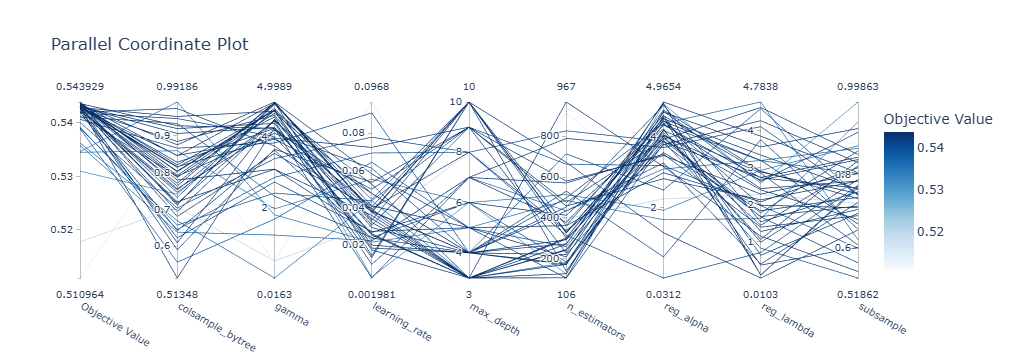

In [6]:
fig = plot_parallel_coordinate(studyc)
fig.show()

podemos observar las rutas que toma cada intento hasta llegar a una precisión.

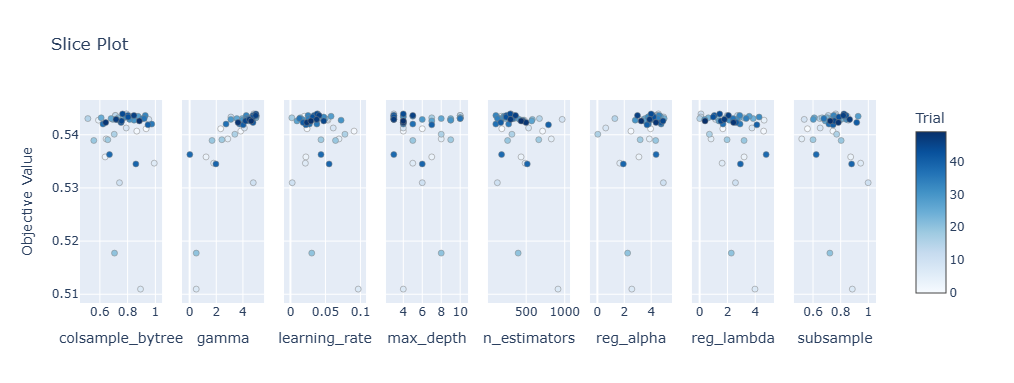

In [7]:
fig2 = plot_slice(studyc)
fig2.show()

Es la concentración de selecciones que hizo optuna, en gamma es evidente que si seleccionamos un valor cercano a 5 tenemos mayor precisión, mientras que por ejemplo, en learning rate la tendencia indica que valores más bajor dan mejores resultados, asi como valores bajos de n_estimators.

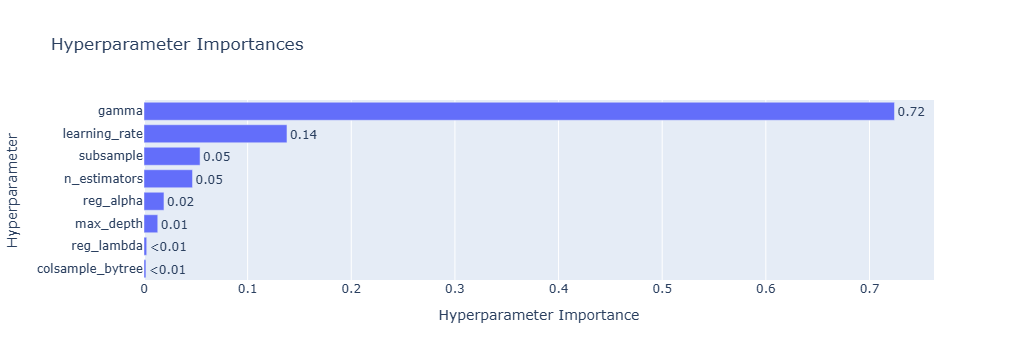

In [8]:
fig3 = plot_param_importances(studyc)
fig3.show()

gamma y learning rate son los hiperparámetros que influyen más en el resultado del modelo al hacer la predicción, hay otros que realmente no influyen e inclus pueden dejarse al azar dentro de cierto rango como la constante en la regularización L2.

#### Prueba con Rating ELO 

El Rating ELO es una medida de clasificación según las victorias o derrotas que tengas, pero no sólo toma en cuenta el hecho de ganar o perder, también considera los rivales contra el que se ha obtenido el resultado, ganar contra rivales fuertes asigna un mayor valor, mientras que perder contra rivales débiles quita muchos puntos

En la base de datos que estamos utilizando no se encuentra disponible una columna que tenga esta característica, sin embargo, podemos calcularla de acuerdo al historial de partidos que tengamos.

El cálculo se hace cronológicamente, asignaré primero 1500 puntos a cada equipo y de acuerdo a sus resultados van a ir modificando esa puntuación.

In [2]:
import numpy as np
import pandas as pd

def agregar_elo(df):
    """
    Recorre los partidos cronológicamente y calcula el rating ELO.
    Maneja cada Liga por separado
    """
    df = df.sort_values('Date').copy()  # ordenar por fecha 
    
    # Configuración ELO
    elo_inicial = 1500
    k_factor = 20       # Qué tanto cambia el ranking (en este caso usamos 20)
    ventaja_local = 50  # Puntos extra por jugar en casa (es más probable la victoria local)
    
    # Guarda el rating ELO para cada equipo
    elo_dict = {}
    
    # Listas para guardar los valores históricos
    elo_home_history = []
    elo_away_history = []
    
    
    for idx, row in df.iterrows(): #bucle partido a partido
        home = row['HomeTeam']
        away = row['AwayTeam']
        
        # 1. Recuperar ELO actual (o inicial si es nuevo)
        elo_h = elo_dict.get(home, elo_inicial)
        elo_a = elo_dict.get(away, elo_inicial)
        
        # Guardamos el ELO con el que llegan al partido
        elo_home_history.append(elo_h)
        elo_away_history.append(elo_a)
        
        # 2. Calcular Resultado Real
        goles_h = row['FTHG']
        goles_a = row['FTAG']
        
        if goles_h > goles_a:
            W_h = 1.0 # Gana Local
        elif goles_h == goles_a:
            W_h = 0.5 # Empate
        else:
            W_h = 0.0 # Gana Visita
            
        # Fórmula ELO estándar
        dr = (elo_h + ventaja_local) - elo_a   #diferencia de rating (notar que se le suma justamente la ventaja local)
        We_h = 1 / (10 ** (-dr / 400) + 1)   # fórmula ELO, convierte la diferencia de puntos de dos equipos en un porcentaje de probabilidad
        # Asigna un valor entre 0 y 1, si se acerca a 1 el local es favorito, si se acerca a cero el visitante es favorito
        # este mismo da información sobre si el resultado fue sorpresivo (muchos puntos) o lo esperado (pocos puntos)

        #  Actualizar ratings para el siguiente partido
        # Añadir un factor extra si el equipo gana por mucha diferencia de goles 
        diff = abs(goles_h - goles_a)
        multiplicador = 1.0 if diff < 2 else np.sqrt(diff) #si son dos goles multiplicador = 2^(1/2)
        
        cambio = k_factor * multiplicador * (W_h - We_h)   # usamos el factor y la diferencia entre lo predicho y lo que pasó en realidad 
        
        elo_dict[home] = elo_h + cambio # añadimos el cambio según el resultado 
        elo_dict[away] = elo_a - cambio
        
    # Agregamos las columnas al df original
    df['Elo_Home'] = elo_home_history
    df['Elo_Away'] = elo_away_history
    
    # Variable Poderosa: Diferencia de ELO
    df['Elo_Diff'] = (df['Elo_Home'] + ventaja_local) - df['Elo_Away']
    
    return df

# Ejecutamos el cálculo
df_elo = agregar_elo(df_clean)

print("Ejemplo: Real Madrid vs Barcelona (últimos registros):")
print(df_elo[df_elo['HomeTeam'].isin(['Real Madrid', 'Barcelona'])][['Date', 'HomeTeam', 'AwayTeam', 'Elo_Home', 'Elo_Away']].tail())

Ejemplo: Real Madrid vs Barcelona (últimos registros):
           Date     HomeTeam   AwayTeam     Elo_Home     Elo_Away
3445 2025-12-20  Real Madrid    Sevilla  1770.732670  1476.969069
3457 2026-01-04  Real Madrid      Betis  1774.167517  1601.183092
3470 2026-01-17  Real Madrid    Levante  1782.845028  1434.011754
3485 2026-01-25    Barcelona     Oviedo  1818.182354  1423.549731
3494 2026-02-01  Real Madrid  Vallecano  1797.274841  1459.225070


In [4]:
# Aseguramos fechas
df_elo['Date'] = pd.to_datetime(df_elo['Date'])

# Limpiamos espacios en blanco
df_elo['HomeTeam'] = df_elo['HomeTeam'].astype(str).str.strip()
df_elo['AwayTeam'] = df_elo['AwayTeam'].astype(str).str.strip()

# Calculamos rachas sobre estos datos limpios
df_rachas_elo = calcular_rachas_complejas(df_elo)

# Aseguramos limpieza también en la tabla de rachas
df_rachas_elo['Date'] = pd.to_datetime(df_rachas_elo['Date'])
df_rachas_elo['Team'] = df_rachas_elo['Team'].astype(str).str.strip()

# hacer el merge 
cols_metricas = [c for c in df_rachas_elo.columns if c.startswith('Form_')]
cols_rachas_clean = ['Date', 'Team'] + cols_metricas


# Cruce Local
df_final_elo = pd.merge(df_elo, df_rachas_elo[cols_rachas_clean], 
                        left_on=['Date', 'HomeTeam'], right_on=['Date', 'Team'], 
                        how='left')

# Renombrar
mapa_local = {col: f"Home_{col.replace('Form_', '')}_Form" for col in cols_metricas}
df_final_elo.rename(columns=mapa_local, inplace=True)
df_final_elo.drop(columns=['Team'], inplace=True)

# Cruce visitante
df_final_elo = pd.merge(df_final_elo, df_rachas_elo[cols_rachas_clean], 
                        left_on=['Date', 'AwayTeam'], right_on=['Date', 'Team'], 
                        how='left') 

# Renombrar
mapa_visita = {col: f"Away_{col.replace('Form_', '')}_Form" for col in cols_metricas}
df_final_elo.rename(columns=mapa_visita, inplace=True)
df_final_elo.drop(columns=['Team'], inplace=True)

# Rellenamos los vacíos con el promedio para no perder las primeras jornadas
cols_nuevas = list(mapa_local.values()) + list(mapa_visita.values())

for col in cols_nuevas:
    # Si la columna está vacía entera, rellenamos con 0
    if df_final_elo[col].isna().all():
        df_final_elo[col] = 0
    else:
        promedio = df_final_elo[col].mean()
        df_final_elo[col] = df_final_elo[col].fillna(promedio)

# Verificación final
df_final_elo.dropna(subset=['Elo_Home', 'Elo_Away'], inplace=True) # Solo borramos si falta el ELO (que es raro)

print(f" Tenemos: {len(df_final_elo)} partidos.")
display(df_final_elo.tail())

 Tenemos: 8203 partidos.


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Home_Goals_For_Form,Home_Goals_Ag_Form,Home_Pts_Form,Away_Shots_Total_For_Form,Away_Shots_Total_Ag_Form,Away_Shots_Target_For_Form,Away_Shots_Target_Ag_Form,Away_Goals_For_Form,Away_Goals_Ag_Form,Away_Pts_Form
8198,NaN,2026-02-01,17:30,Getafe,Celta,0,0,D,0.0,0.0,...,0.6,1.8,0.4,11.0,11.4,5.2,3.4,1.8,0.8,2.0
8199,NaN,2026-02-01,19:45,Strasbourg,Paris SG,1,2,A,1.0,1.0,...,1.4,0.8,1.6,16.6,7.2,7.8,2.8,2.8,0.6,3.0
8200,NaN,2026-02-02,20:00,Mallorca,Sevilla,4,1,H,1.0,1.0,...,1.2,2.0,0.8,14.2,11.6,5.8,5.4,0.8,1.8,0.8
8201,NaN,2026-02-02,20:00,Sunderland,Burnley,3,0,H,2.0,0.0,...,0.8,1.6,1.0,8.6,23.0,2.6,9.0,1.2,2.0,0.6
8202,NaN,2026-02-02,19:45,Udinese,Roma,1,0,H,0.0,0.0,...,1.4,1.2,1.4,15.0,7.4,5.0,2.4,1.4,0.4,2.0


In [20]:
cols_keep = ['Date', 'League_ID', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 
             'Odds_Home', 'Odds_Draw', 'Odds_Away', 'Home_Pts', 'Away_Pts', 'Elo_Home', 'Elo_Away', 'Elo_Diff']
df_modeloE = df_final_elo[cols_keep].sort_values('Date')
df_modeloE.head()

,Date,League_ID,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,Odds_Home,Odds_Draw,Odds_Away,Home_Pts,Away_Pts,Elo_Home,Elo_Away,Elo_Diff
0,2021-08-06,NaN,Monaco,Nantes,1,1,15.0,5.0,3.0,1.0,1.611667,4.584375,5.477083,1,1,1500.0,1500.0,50.0
1,2021-08-07,NaN,Troyes,Paris SG,1,2,15.0,12.0,7.0,3.0,7.567083,5.697500,1.534583,0,3,1500.0,1500.0,50.0
2,2021-08-07,NaN,Lyon,Brest,1,1,17.0,13.0,4.0,8.0,1.554167,5.494375,6.219583,1,1,1500.0,1500.0,50.0
3,2021-08-08,NaN,Montpellier,Marseille,2,3,8.0,21.0,1.0,7.0,2.866667,3.513125,2.141667,0,3,1500.0,1500.0,50.0
4,2021-08-08,NaN,Metz,Lille,3,3,12.0,18.0,5.0,7.0,4.182500,3.408125,1.833750,1,1,1500.0,1500.0,50.0


Usamos nuevamente optuna, ya que el modelo va a cambiar añadiendo las estadísticas de ELO

In [23]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import TimeSeriesSplit

# 1. Usamos el dataset CON ELO
features_elo = [
    'Elo_Diff', 'Elo_Home', 'Elo_Away', 
    'Odds_Home', 'Odds_Draw', 'Odds_Away',
    'Home_Shots_Total_For_Form', 'Home_Shots_Target_For_Form', 
    'Home_Goals_For_Form', 'Home_Goals_Ag_Form', 'Home_Pts_Form',
    'Away_Shots_Total_For_Form', 'Away_Shots_Target_For_Form',
    'Away_Goals_For_Form', 'Away_Goals_Ag_Form', 'Away_Pts_Form'
]

X = df_final_elo[features_elo]
y = df_final_elo['target']

# Validación temporal (5 bloques)
tscv = TimeSeriesSplit(n_splits=5)

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 800),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5), 
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),      
        'n_jobs': -1,
        'random_state': 142
    }
    
    scores = []
    for train_index, test_index in tscv.split(X):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        
        model = XGBClassifier(**param)
        model.fit(X_train_fold, y_train_fold)
        preds = model.predict(X_test_fold)
        scores.append(accuracy_score(y_test_fold, preds))
    
    return np.mean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30) # 30 intentos rápidos

print(" Mejores parámetros encontrados:")
print(study.best_params)

[I 2026-02-02 23:11:39,190] A new study created in memory with name: no-name-49a3463f-4aac-46cf-a7d0-e09858d4e01e
[I 2026-02-02 23:11:55,054] Trial 0 finished with value: 0.5441111923920995 and parameters: {'n_estimators': 791, 'learning_rate': 0.014219158240401451, 'max_depth': 4, 'subsample': 0.784132873229992, 'colsample_bytree': 0.89666130449891, 'gamma': 4.946090628620347, 'reg_alpha': 2.4470370563157258, 'reg_lambda': 2.694001457332278}. Best is trial 0 with value: 0.5441111923920995.
[I 2026-02-02 23:12:02,401] Trial 1 finished with value: 0.5430870519385514 and parameters: {'n_estimators': 475, 'learning_rate': 0.05803124098400719, 'max_depth': 6, 'subsample': 0.7454194566606311, 'colsample_bytree': 0.6383453960281206, 'gamma': 4.062118188003773, 'reg_alpha': 3.096760741261229, 'reg_lambda': 1.631247547121684}. Best is trial 0 with value: 0.5441111923920995.
[I 2026-02-02 23:12:11,430] Trial 2 finished with value: 0.5381126554498903 and parameters: {'n_estimators': 438, 'learni

 Mejores parámetros encontrados:
{'n_estimators': 240, 'learning_rate': 0.08006510805205322, 'max_depth': 6, 'subsample': 0.8796025010726853, 'colsample_bytree': 0.8323158658102011, 'gamma': 4.826781580905294, 'reg_alpha': 4.549207796457939, 'reg_lambda': 4.051166577560212}


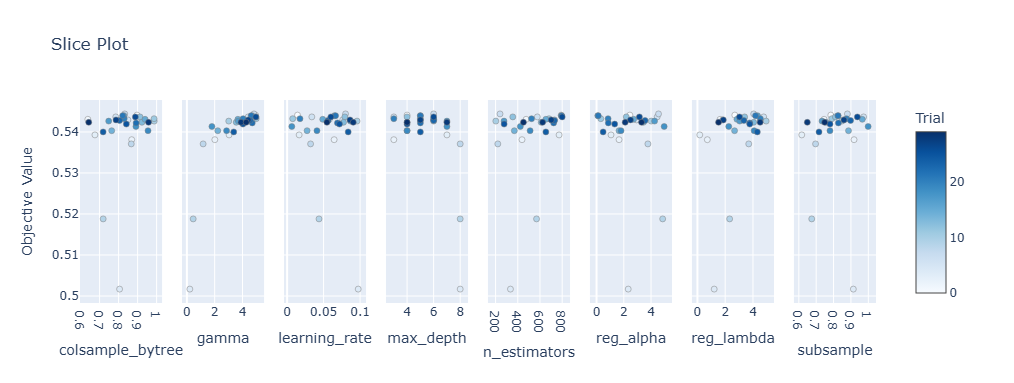

In [24]:
Fig = plot_slice(study)
Fig.show()

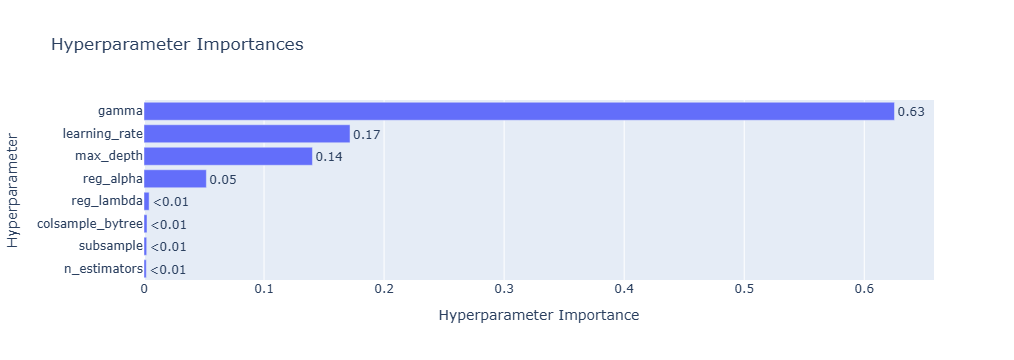

In [25]:
Fig2 = plot_param_importances(study)
Fig2.show()

 PRECISIÓN FINAL (TEST SET): 54.24%


[02/03/26 23:02:17] WARNING  C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\sklearn\metric ]8;id=316174;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\warnings.py\warnings.py]8;;\:]8;id=461795;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\warnings.py#109\109]8;;\
                             s\_classification.py:1731: UndefinedMetricWarning: Precision is                       
                             ill-defined and being set to 0.0 in labels with no predicted samples.                 
                             Use `zero_division` parameter to control this behavior.                               
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             result.shape[0])                                                                      
                                                                                                                   

[02/03/26 23:02:18] WARNING  C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\sklearn\metric ]8;id=650535;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\warnings.py\warnings.py]8;;\:]8;id=140008;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\warnings.py#109\109]8;;\
                             s\_classification.py:1731: UndefinedMetricWarning: Precision is                       
                             ill-defined and being set to 0.0 in labels with no predicted samples.                 
                             Use `zero_division` parameter to control this behavior.                               
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             result.shape[0])                                                                      
                                                                                                                   

                    WARNING  C:\Users\Moises\anaconda3\envs\tf_env\lib\site-packages\sklearn\metric ]8;id=727916;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\warnings.py\warnings.py]8;;\:]8;id=961504;file://C:\Users\Moises\anaconda3\envs\tf_env\lib\warnings.py#109\109]8;;\
                             s\_classification.py:1731: UndefinedMetricWarning: Precision is                       
                             ill-defined and being set to 0.0 in labels with no predicted samples.                 
                             Use `zero_division` parameter to control this behavior.                               
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             result.shape[0])                                                                      
                                                                                                                   

              precision    recall  f1-score   support

   Local (0)       0.54      0.85      0.66       712
  Empate (1)       0.00      0.00      0.00       408
  Visita (2)       0.54      0.55      0.54       521

    accuracy                           0.54      1641
   macro avg       0.36      0.47      0.40      1641
weighted avg       0.41      0.54      0.46      1641



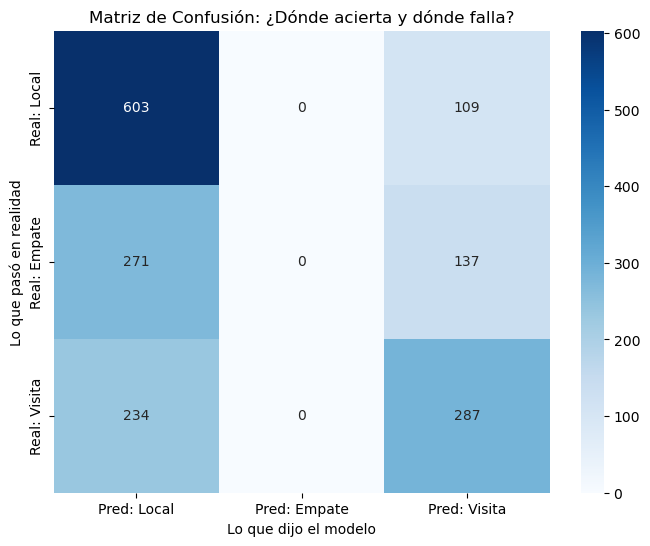

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Probamos los hiperparámetros del mejor experimento hecho por optuna 
mejores_params = {
    'n_estimators': 240,      # no es muy reelevante
    'learning_rate': 0.08006510805205322,   # (probamos con el mejor lr
    'max_depth': 6,           
    'gamma': 4.8267,             # el más importante según optuna
    'subsample': 0.8796025010726853,
    'colsample_bytree': 0.832315,
    'n_jobs': -1,
    'random_state': 42
}

# Definimos el Target (0=Local, 1=Empate, 2=Visita)
condiciones = [
    (df_final_elo['FTHG'] > df_final_elo['FTAG']),
    (df_final_elo['FTHG'] == df_final_elo['FTAG']),
    (df_final_elo['FTHG'] < df_final_elo['FTAG'])
]
df_final_elo['target'] = np.select(condiciones, [0, 1, 2])

# Lista de Features 
features = [
    'Elo_Diff', 'Elo_Home', 'Elo_Away',
    'Odds_Home', 'Odds_Draw', 'Odds_Away',
    'Home_Shots_Total_For_Form', 'Home_Shots_Target_For_Form', 
    'Home_Goals_For_Form', 'Home_Goals_Ag_Form', 'Home_Pts_Form',
    'Away_Shots_Total_For_Form', 'Away_Shots_Target_For_Form',
    'Away_Goals_For_Form', 'Away_Goals_Ag_Form', 'Away_Pts_Form'
]

X = df_final_elo[features]
y = df_final_elo['target']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Entrenamiento
modelo_final = XGBClassifier(**mejores_params)
modelo_final.fit(X_train, y_train)

# Evaluación
y_pred = modelo_final.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f" PRECISIÓN FINAL (TEST SET): {acc:.2%}")


# Reporte
print(classification_report(y_test, y_pred, target_names=['Local (0)', 'Empate (1)', 'Visita (2)']))

#  Matriz de Confusión Visual (Heatmap)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred: Local', 'Pred: Empate', 'Pred: Visita'],
            yticklabels=['Real: Local', 'Real: Empate', 'Real: Visita'])
plt.title('Matriz de Confusión: ¿Dónde acierta y dónde falla?')
plt.ylabel('Lo que pasó en realidad')
plt.xlabel('Lo que dijo el modelo')
plt.show()

La precisión fue practicamente la misma a que cuando no utilizamos el Rating ELO, sin embargo, si antes el modelo no se animaba mucho a predecir empates, ahora este no ha predicho ninguno, es algo que se tiene que mejorar ya que esto empeora considerablemente la precisión.

<Figure size 1000x800 with 0 Axes>

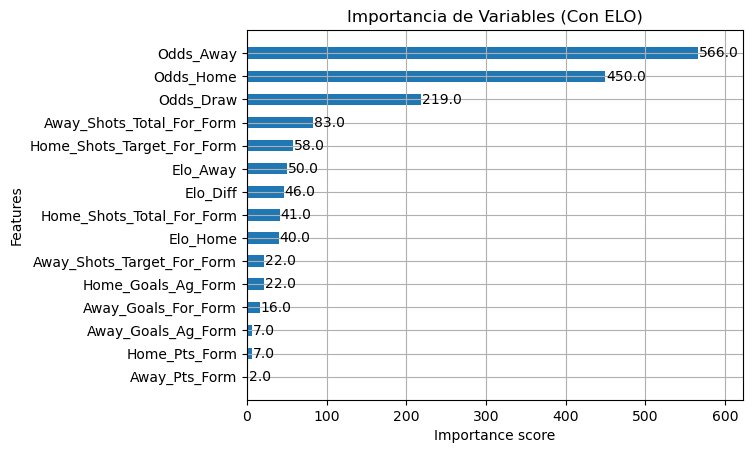

In [27]:
# 5. Importancia de Variables
plt.figure(figsize=(10, 8))
plot_importance(modelo_elo, max_num_features=15, height=0.5, importance_type='weight', title='Importancia de Variables (Con ELO)')
plt.show()

Podemos observar que las estadisticas relacionadas a los rating ELO han tomado importancia.

Para tratar de solucionar que la red no prediga empates, se le dará mayor peso a esta selección.

 PRECISIÓN CON ESTRATEGIA DE UMBRAL (28.999999999999996%): 50.27%
--------------------------------------------------

Matriz de Confusión Híbrida:


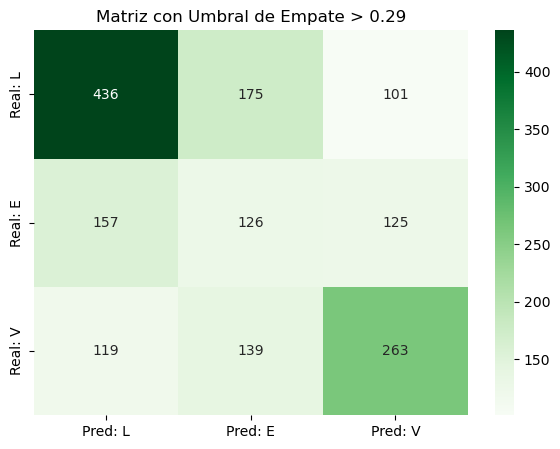


Reporte de Clasificación:
              precision    recall  f1-score   support

       Local       0.61      0.61      0.61       712
      Empate       0.29      0.31      0.30       408
      Visita       0.54      0.50      0.52       521

    accuracy                           0.50      1641
   macro avg       0.48      0.48      0.48      1641
weighted avg       0.51      0.50      0.50      1641



In [8]:

modelo_final = XGBClassifier(**mejores_params)
modelo_final.fit(X_train, y_train)

# Obtener probabilidades 
# Esto nos da 3 columnas: [% Local, % Empate, % Visita]
probs = modelo_final.predict_proba(X_test)

y_pred_smart = []
umbral_empate = 0.29  
# Significa: "Si la probabilidad de empate es mayor al 29%, apuesta al Empate"

for i in range(len(probs)):
    prob_local = probs[i][0]
    prob_empate = probs[i][1]
    prob_visita = probs[i][2]
    
    # si el empate tiene mucha probabilidad (>= 29%) la red seleccionará empate
    if prob_empate > umbral_empate:
        y_pred_smart.append(1) # Empate
    else:
        # Si no, elegimos el favorito entre Local y Visita
        if prob_local > prob_visita:
            y_pred_smart.append(0) # Local
        else:
            y_pred_smart.append(2) # Visita

# Evaluación
acc_smart = accuracy_score(y_test, y_pred_smart)


print(f" PRECISIÓN CON ESTRATEGIA DE UMBRAL ({umbral_empate*100}%): {acc_smart:.2%}")
print("-" * 50)

# Ver la nueva matriz
print("\nMatriz de Confusión Híbrida:")
cm = confusion_matrix(y_test, y_pred_smart)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Pred: L', 'Pred: E', 'Pred: V'],
            yticklabels=['Real: L', 'Real: E', 'Real: V'])
plt.title(f'Matriz con Umbral de Empate > {umbral_empate}')
plt.show()

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_smart, target_names=['Local', 'Empate', 'Visita']))

Ahora el modelo predice empates, pero obligarlo a seleccionar esta opción reduce las ocasiones donde acierta que gana el local o el visitante, reduciendo la precisión en las selecciones.

Podriamos hacer una prueba donde se busque el mejor umbral para seleccionar el empate como predicción

In [10]:
import numpy as np
from sklearn.metrics import accuracy_score

# 1. Obtenemos probabilidades del test set
probs = modelo_final.predict_proba(X_test)

best_acc = 0  #listas  
best_threshold = 0

# 2. Probamos todos los umbrales de 0.20 a 0.40
for t in np.arange(0.20, 0.40, 0.01):
    y_pred_temp = []
    for i in range(len(probs)):
        # Si la prob de empate supera t, predecimos Empate (1)
        if probs[i][1] > t:
            y_pred_temp.append(1)
        else:
            # Si no, el máximo entre Local y Visita
            if probs[i][0] > probs[i][2]:
                y_pred_temp.append(0)
            else:
                y_pred_temp.append(2)
    
    acc = accuracy_score(y_test, y_pred_temp)
    
    # Guardamos si es el mejor récord
    if acc > best_acc:
        best_acc = acc
        best_threshold = t
    
    # Imprimimos para ver la evolución (Opcional)
    # print(f"Umbral {t:.2f} -> Accuracy: {acc:.2%}")

print(f"   MEJOR RESULTADO POSIBLE:")
print(f"   Umbral Óptimo: {best_threshold:.2f}")
print(f"   Precisión Máxima: {best_acc:.2%}")

   MEJOR RESULTADO POSIBLE:
   Umbral Óptimo: 0.32
   Precisión Máxima: 54.30%


Puede parecer que el modelo que selecciona empates sea peor, pero si trataramos de optimizar las ganancias en una página de apuestas, a veces es mejor acertar la predicción de algunos empates (cuota 3.50) a victorias de los equipos favoritos (cuota 1.30). 

Lo siguiente será hacer un simulador de rentabilidad, para ver cual de los dos modelos es mejor en ese sentido.

In [11]:
import pandas as pd
import numpy as np

# --- 1. PREPARACIÓN DE LOS CONTENDIENTES ---

# A) Modelo Conservador (Estándar)
# El que tenías al principio, que tiende a ignorar empates
preds_conservador = modelo_final.predict(X_test)

# B) Modelo Estratega (Umbral 0.32)
# El que acabas de descubrir con el optimizador
probs = modelo_final.predict_proba(X_test)
preds_estratega = []
umbral = 0.32  # Tu hallazgo

for i in range(len(probs)):
    if probs[i][1] > umbral:
        preds_estratega.append(1) # Forzar Empate
    else:
        # Si no es empate, elije el más alto entre Local y Visita
        if probs[i][0] > probs[i][2]:
            preds_estratega.append(0)
        else:
            preds_estratega.append(2)

# --- 2. MOTOR DE SIMULACIÓN FINANCIERA ---
def simular_dinero(predicciones, nombre_modelo):
    saldo = 0
    apostado = 0
    aciertos = 0
    empates_predichos = 0
    empates_acertados = 0
    
    # Recuperamos las cuotas reales usando los índices del test
    indices = X_test.index
    odds_reales = df_final_elo.loc[indices][['Odds_Home', 'Odds_Draw', 'Odds_Away']]
    
    for i in range(len(predicciones)):
        pred = predicciones[i]
        real = y_test.iloc[i]
        
        # Cuotas del partido
        cuotas = [
            odds_reales.iloc[i]['Odds_Home'], # 0
            odds_reales.iloc[i]['Odds_Draw'], # 1
            odds_reales.iloc[i]['Odds_Away']  # 2
        ]
        
        apuesta = 10 # 10€ por partido
        apostado += apuesta
        
        if pred == 1:
            empates_predichos += 1
        
        # Verificar resultado
        if pred == real:
            ganancia = apuesta * cuotas[pred]
            saldo += (ganancia - apuesta)
            aciertos += 1
            if pred == 1:
                empates_acertados += 1
        else:
            saldo -= apuesta
            
    roi = (saldo / apostado) * 100
    acc = (aciertos / len(predicciones)) * 100
    
    print(f"📊 {nombre_modelo.upper()}")
    print(f"   Precisión: {acc:.2f}%")
    print(f"   Empates Apostados: {empates_predichos} (Acertados: {empates_acertados})")
    print(f"   Balance Final: {saldo:.2f}€ (invirtiendo {apostado}€)")
    print(f"   💰 ROI (Rentabilidad): {roi:.2f}%")
    print("-" * 40)

# --- 3. ¡FIGHT! ---
print("🏆 RESULTADOS DE LA TEMPORADA SIMULADA\n")
simular_dinero(preds_conservador, "Modelo Conservador (Sin Umbral)")
simular_dinero(preds_estratega, f"Modelo Estratega (Umbral {umbral})")

🏆 RESULTADOS DE LA TEMPORADA SIMULADA

📊 MODELO CONSERVADOR (SIN UMBRAL)
   Precisión: 54.24%
   Empates Apostados: 0 (Acertados: 0)
   Balance Final: 304.75€ (invirtiendo 16410€)
   💰 ROI (Rentabilidad): 1.86%
----------------------------------------
📊 MODELO ESTRATEGA (UMBRAL 0.32)
   Precisión: 54.30%
   Empates Apostados: 20 (Acertados: 9)
   Balance Final: 416.53€ (invirtiendo 16410€)
   💰 ROI (Rentabilidad): 2.54%
----------------------------------------


Hemos tenido mejor rentabilidad en el segundo modelo, proximamente se registrarán pruebas con los partidos en las 5 grandes ligas de europa